In [177]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [178]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [179]:
import cv2

In [180]:
!pip install opencv-python


In [181]:
dataset_path_training = "C:\\Users\\shani\\OneDrive\\Documents\\Dwdm project"
train = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)
train_data = train.flow_from_directory('C:\\Users\\shani\\OneDrive\\Documents\\Dwdm project\\Train-data\\',target_size=(5,5),batch_size=2,class_mode='binary')
test_data = test.flow_from_directory('C:\\Users\\shani\\OneDrive\\Documents\\Dwdm project\\Test_data\\',target_size=(5,5),batch_size=2,class_mode='binary')
print("The Classes are : \n ",train_data.classes)

print("Creating the CNN......\n")

Found 60 images belonging to 2 classes.
Found 21 images belonging to 2 classes.
The Classes are : 
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Creating the CNN......



In [182]:
img = image.load_img("C:\\Users\\shani\\OneDrive\\Documents\\Dwdm project\\Train-data\\Dwdm cats\\download.jpg")

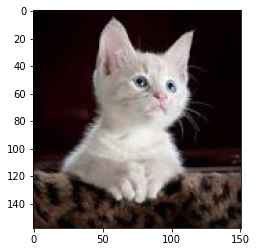

In [183]:
plt.imshow(img)

In [184]:
cv2.imread("C:\\Users\\shani\\OneDrive\\Documents\\Dwdm project\\Train-data\\Dwdm cats\\download.jpg")

array([[[ 1,  0,  2],
        [ 1,  0,  2],
        [ 1,  0,  2],
        ...,
        [ 0,  0,  8],
        [ 0,  0,  8],
        [ 0,  0,  8]],

       [[ 1,  0,  2],
        [ 1,  0,  2],
        [ 1,  0,  2],
        ...,
        [ 0,  0,  8],
        [ 0,  0,  8],
        [ 0,  0,  8]],

       [[ 1,  0,  2],
        [ 1,  0,  2],
        [ 1,  0,  2],
        ...,
        [ 0,  0,  8],
        [ 0,  0,  8],
        [ 0,  0,  8]],

       ...,

       [[19, 33, 56],
        [15, 29, 52],
        [22, 35, 57],
        ...,
        [43, 51, 64],
        [27, 35, 48],
        [20, 26, 39]],

       [[25, 39, 62],
        [14, 28, 51],
        [15, 27, 51],
        ...,
        [40, 47, 62],
        [22, 29, 44],
        [10, 15, 30]],

       [[28, 42, 65],
        [11, 25, 48],
        [ 6, 18, 42],
        ...,
        [39, 46, 61],
        [20, 27, 42],
        [ 4,  9, 24]]], dtype=uint8)

In [185]:
cv2.imread("C:\\Users\\shani\\OneDrive\\Documents\\Dwdm project\\Train-data\\Dwdm cats\\download.jpg").shape

(158, 151, 3)

In [186]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [187]:
train_data = train.flow_from_directory("C:\\Users\\shani\\OneDrive\\Documents\\Dwdm project\\Train-data\\",
                                        target_size=(200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')
validation_data = validation.flow_from_directory("C:\\Users\\shani\\OneDrive\\Documents\\Dwdm project\\validation_data\\",
                                        target_size=(200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')


Found 60 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [188]:
train_data.class_indices

{'Dwdm cats': 0, 'dwdm dogs': 1}

In [189]:
train_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [190]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    ])


In [191]:
model.compile(loss='binary_crossentropy',
              optimizer= RMSprop(learning_rate=0.001),
             metrics=['accuracy'])

In [192]:
model_fit=model.fit(train_data,
                   steps_per_epoch=3,
                   epochs=10,
                   validation_data = validation_data)

Epoch 1/10
3/3 [==============================] - 5s 1s/step - loss: 6.3669 - accuracy: 0.5556 - val_loss: 1.2799 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 4s 1s/step - loss: 1.3353 - accuracy: 0.3333 - val_loss: 0.6773 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 4s 956ms/step - loss: 0.6808 - accuracy: 0.4444 - val_loss: 0.6737 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 3s 885ms/step - loss: 0.7260 - accuracy: 0.5556 - val_loss: 0.6785 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 3s 1s/step - loss: 0.6533 - accuracy: 0.6667 - val_loss: 0.6594 - val_accuracy: 0.7000
Epoch 6/10
3/3 [==============================] - 3s 1s/step - loss: 0.8211 - accuracy: 0.4444 - val_loss: 0.6856 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 2s 852ms/step - loss: 0.6698 - accuracy: 0.7778 - val_loss: 0.7048 - val_accuracy: 0.5000
Epoch 8/10
3/3 [================

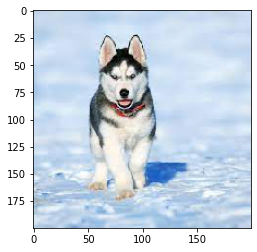

1/1 [==============================] - 0s 114ms/step
Dogs


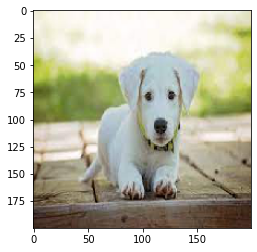

1/1 [==============================] - 0s 31ms/step
Dogs


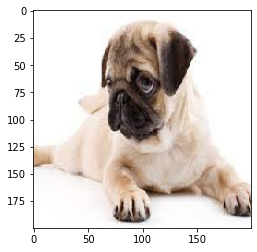

1/1 [==============================] - 0s 55ms/step
Dogs


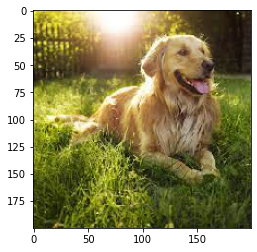

1/1 [==============================] - 0s 21ms/step
Dogs


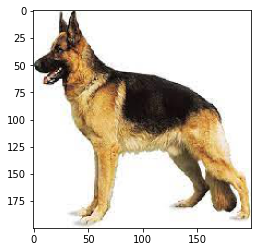

1/1 [==============================] - 0s 25ms/step
Dogs


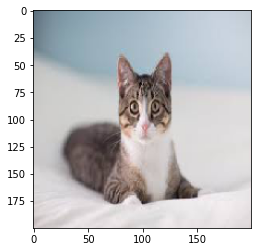

1/1 [==============================] - 0s 36ms/step
Cats


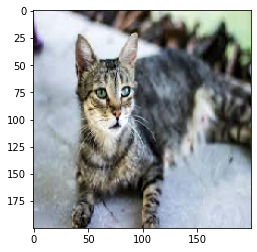

1/1 [==============================] - 0s 16ms/step
Cats


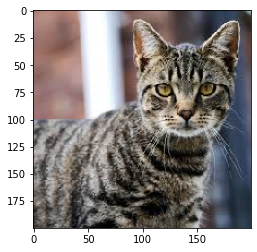

1/1 [==============================] - 0s 44ms/step
Cats


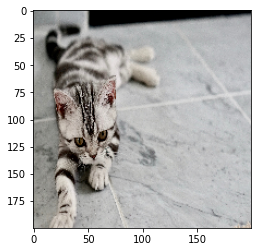

1/1 [==============================] - 0s 35ms/step
Cats


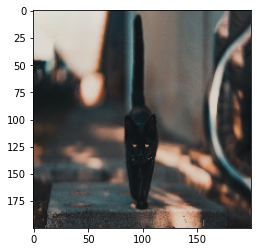

1/1 [==============================] - 0s 44ms/step
Cats


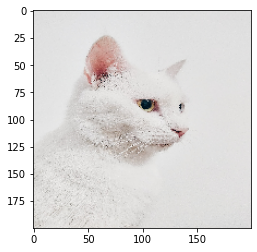

1/1 [==============================] - 0s 28ms/step
Dogs


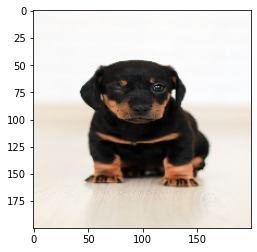

1/1 [==============================] - 0s 50ms/step
Dogs


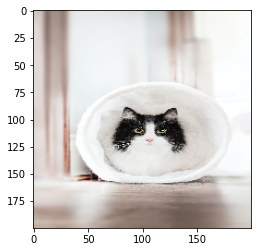

1/1 [==============================] - 0s 33ms/step
Dogs


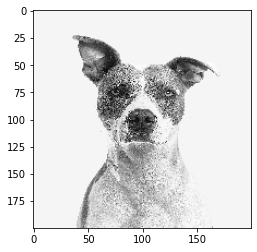

1/1 [==============================] - 0s 39ms/step
Dogs


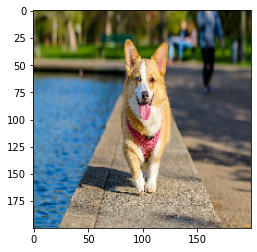

1/1 [==============================] - 0s 45ms/step
Dogs


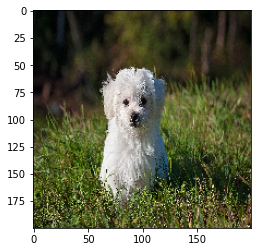

1/1 [==============================] - 0s 39ms/step
Dogs


In [193]:
dir_path = 'C:\\Users\\shani\\OneDrive\\Documents\\Dwdm project\\Test_data\\Dwdm cats'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path +'\\' + i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if(val == 0):
        print("Cats")
    else:
        print("Dogs")